# 📊 Pune Commercial Real Estate - Data Visualization Analysis

**Dataset:** 621 cleaned commercial property listings in Pune

**Analysis Structure:**
1. **Univariate Analysis** - Individual variable distributions
2. **Bivariate Analysis** - Relationships between two variables
3. **Multivariate Analysis** - Complex relationships and patterns

---

## 📦 Setup: Imports and Data Loading

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load cleaned data
df = pd.read_csv('pune_commercial_listings_FINAL.csv')

print(f"✅ Data loaded successfully!")
print(f"Total records: {len(df)}")
print(f"Data Quality: 99.36%")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()

✅ Data loaded successfully!
Total records: 621
Data Quality: 99.36%

Columns: ['locality', 'property_type', 'location_text', 'area_sqft', 'rent_amount', 'maintenance_amount', 'deposit_amount', 'total_monthly_cost', 'rent_per_sqft', 'rent_outlier', 'sqft_outlier', 'rent_psf_outlier']

First few rows:


,locality,property_type,location_text,area_sqft,rent_amount,maintenance_amount,deposit_amount,total_monthly_cost,rent_per_sqft,rent_outlier,sqft_outlier,rent_psf_outlier
0,Kothrud,Warehouse,Hapoy Colony Near Van Devi Mandir Karve Nagar ...,650.0,12000,0,24000,12000,18.46,0,0,0
1,Kothrud,Shop,"Gandhi Bhavan Rd, Gandhi Bhavan (Maharashtra G...",160.0,20000,0,60000,20000,125.00,0,0,0
2,Kothrud,Shop,"Chandani Chowk , Shinde Farm Golden Group,",500.0,100000,0,200000,100000,200.00,0,0,0
3,Kothrud,Office,"Paschimanagri,, City Pride- Kothrud",230.0,100000,13000,500000,113000,434.78,0,0,0
4,Kothrud,Office,"Late. G A Kulkarni Road, Opposite Karishma Soc...",100.0,10000,0,10000,10000,100.00,0,0,0


## 🔍 Data Overview and Summary Statistics

In [14]:
# Basic statistics
print("="*80)
print("DATASET SUMMARY")
print("="*80)
print(f"\nShape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nProperty Type Distribution:")
print(df['property_type'].value_counts())

print(f"\n\nKey Statistics:")
print(df[['rent_amount', 'area_sqft', 'rent_per_sqft']].describe())

# Missing values check
print(f"\n\nMissing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ No missing values!")
else:
    print(missing[missing > 0])

DATASET SUMMARY

Shape: 621 rows × 12 columns

Property Type Distribution:
property_type
Office        364
Shop          176
Warehouse      48
Commercial     19
Showroom        8
Restaurant      6
Name: count, dtype: int64


Key Statistics:
        rent_amount   area_sqft  rent_per_sqft
count  6.210000e+02  621.000000     621.000000
mean   6.523655e+04  398.878422     205.958293
std    1.253126e+05  216.474008     463.493304
min    4.000000e+03   50.000000       8.790000
25%    2.000000e+04  225.000000      57.890000
50%    3.500000e+04  350.000000      84.620000
75%    6.500000e+04  531.000000     163.620000
max    1.821000e+06  992.000000    7883.120000


Missing Values:
✅ No missing values!


---

# 1️⃣ UNIVARIATE ANALYSIS

**Purpose:** Understand the distribution of individual variables

**Variables Analyzed:**
- Rent Amount (₹)
- Area (sqft)
- Rent per sqft (₹/sqft)
- Property Type
- Locality

---

### 1.1 Rent Amount Distribution

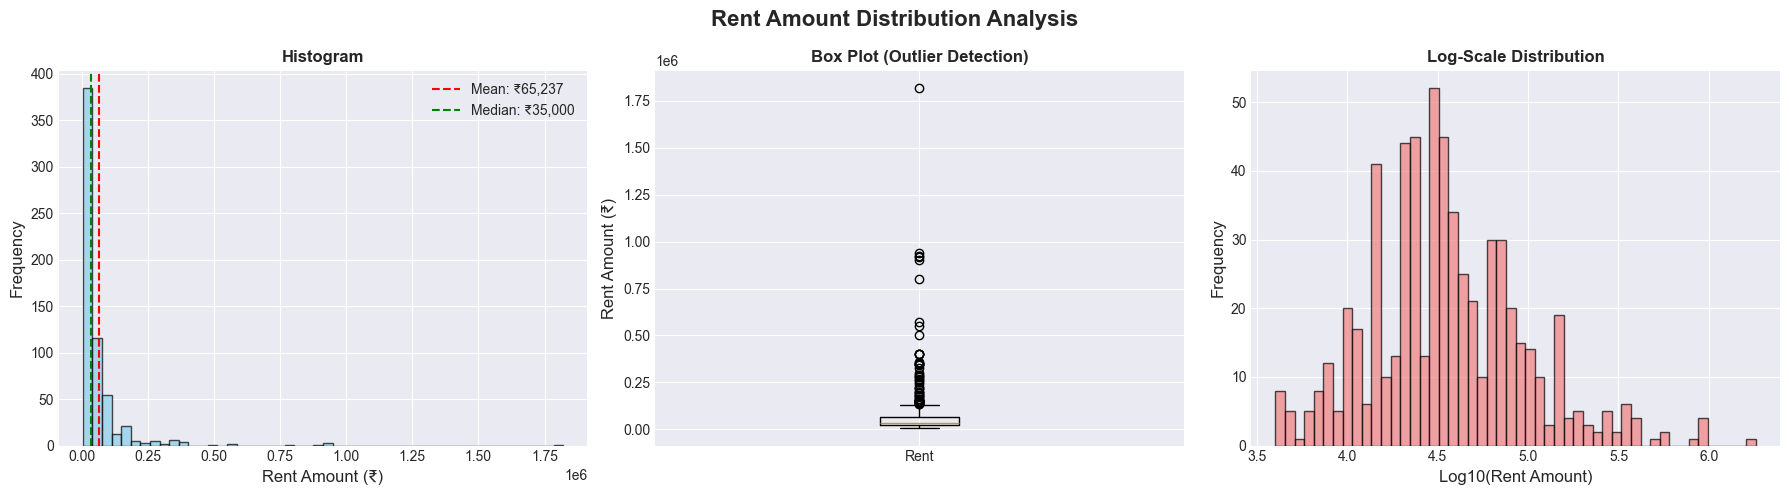


Rent Amount Statistics:
  Mean: ₹65,236.55
  Median: ₹35,000.00
  Std Dev: ₹125,312.61
  Min: ₹4,000.00
  Max: ₹1,821,000.00
  Skewness: 7.42


In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Rent Amount Distribution Analysis', fontsize=16, fontweight='bold')

# Histogram
axes[0].hist(df['rent_amount'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_xlabel('Rent Amount (₹)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Histogram', fontweight='bold')
axes[0].axvline(df['rent_amount'].mean(), color='red', linestyle='--', label=f'Mean: ₹{df["rent_amount"].mean():,.0f}')
axes[0].axvline(df['rent_amount'].median(), color='green', linestyle='--', label=f'Median: ₹{df["rent_amount"].median():,.0f}')
axes[0].legend()

# Box Plot
axes[1].boxplot(df['rent_amount'], vert=True)
axes[1].set_ylabel('Rent Amount (₹)', fontsize=12)
axes[1].set_title('Box Plot (Outlier Detection)', fontweight='bold')
axes[1].set_xticklabels(['Rent'])

# Log Scale Histogram
axes[2].hist(np.log10(df['rent_amount']), bins=50, edgecolor='black', alpha=0.7, color='lightcoral')
axes[2].set_xlabel('Log10(Rent Amount)', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].set_title('Log-Scale Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

# Statistics
print(f"\nRent Amount Statistics:")
print(f"  Mean: ₹{df['rent_amount'].mean():,.2f}")
print(f"  Median: ₹{df['rent_amount'].median():,.2f}")
print(f"  Std Dev: ₹{df['rent_amount'].std():,.2f}")
print(f"  Min: ₹{df['rent_amount'].min():,.2f}")
print(f"  Max: ₹{df['rent_amount'].max():,.2f}")
print(f"  Skewness: {df['rent_amount'].skew():.2f}")

### 1.2 Area (sqft) Distribution

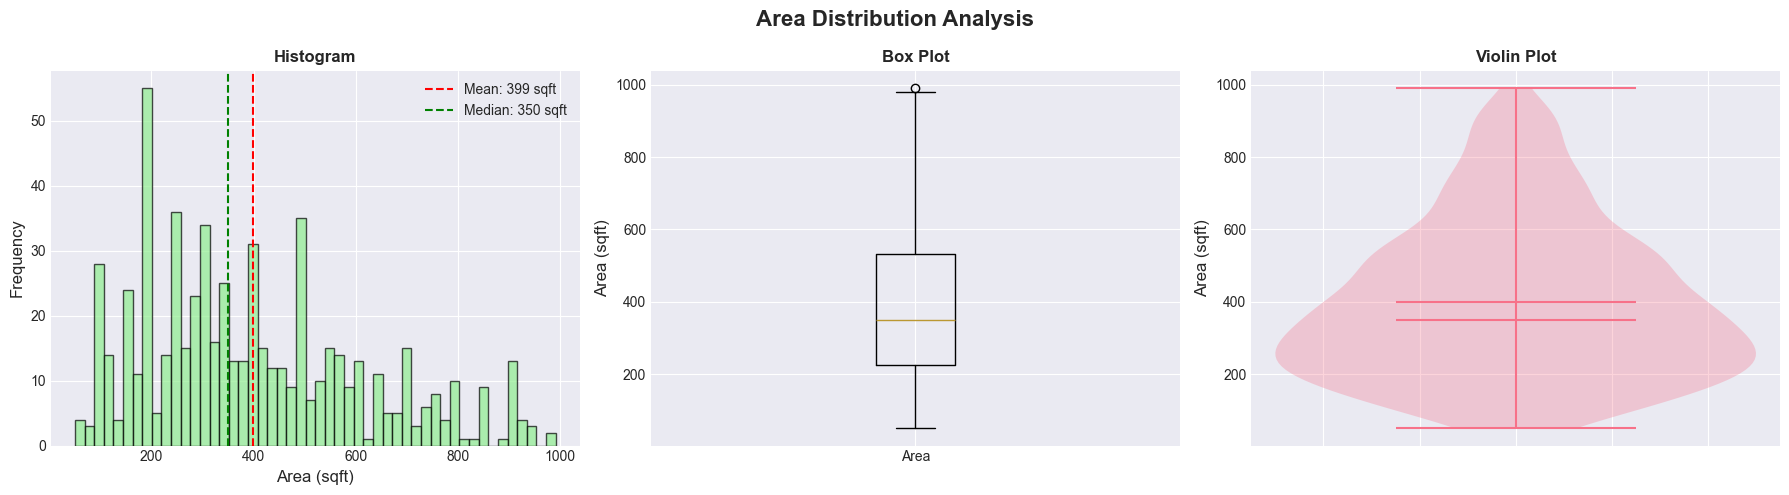


Area Statistics:
  Mean: 398.88 sqft
  Median: 350.00 sqft
  Std Dev: 216.47 sqft
  Min: 50.00 sqft
  Max: 992.00 sqft
  Skewness: 0.68


In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Area Distribution Analysis', fontsize=16, fontweight='bold')

# Histogram
axes[0].hist(df['area_sqft'], bins=50, edgecolor='black', alpha=0.7, color='lightgreen')
axes[0].set_xlabel('Area (sqft)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Histogram', fontweight='bold')
axes[0].axvline(df['area_sqft'].mean(), color='red', linestyle='--', label=f'Mean: {df["area_sqft"].mean():.0f} sqft')
axes[0].axvline(df['area_sqft'].median(), color='green', linestyle='--', label=f'Median: {df["area_sqft"].median():.0f} sqft')
axes[0].legend()

# Box Plot
axes[1].boxplot(df['area_sqft'], vert=True)
axes[1].set_ylabel('Area (sqft)', fontsize=12)
axes[1].set_title('Box Plot', fontweight='bold')
axes[1].set_xticklabels(['Area'])

# Violin Plot
parts = axes[2].violinplot([df['area_sqft']], vert=True, showmeans=True, showmedians=True)
axes[2].set_ylabel('Area (sqft)', fontsize=12)
axes[2].set_title('Violin Plot', fontweight='bold')
axes[2].set_xticklabels(['Area'])

plt.tight_layout()
plt.show()

# Statistics
print(f"\nArea Statistics:")
print(f"  Mean: {df['area_sqft'].mean():.2f} sqft")
print(f"  Median: {df['area_sqft'].median():.2f} sqft")
print(f"  Std Dev: {df['area_sqft'].std():.2f} sqft")
print(f"  Min: {df['area_sqft'].min():.2f} sqft")
print(f"  Max: {df['area_sqft'].max():.2f} sqft")
print(f"  Skewness: {df['area_sqft'].skew():.2f}")

### 1.3 Property Type Distribution

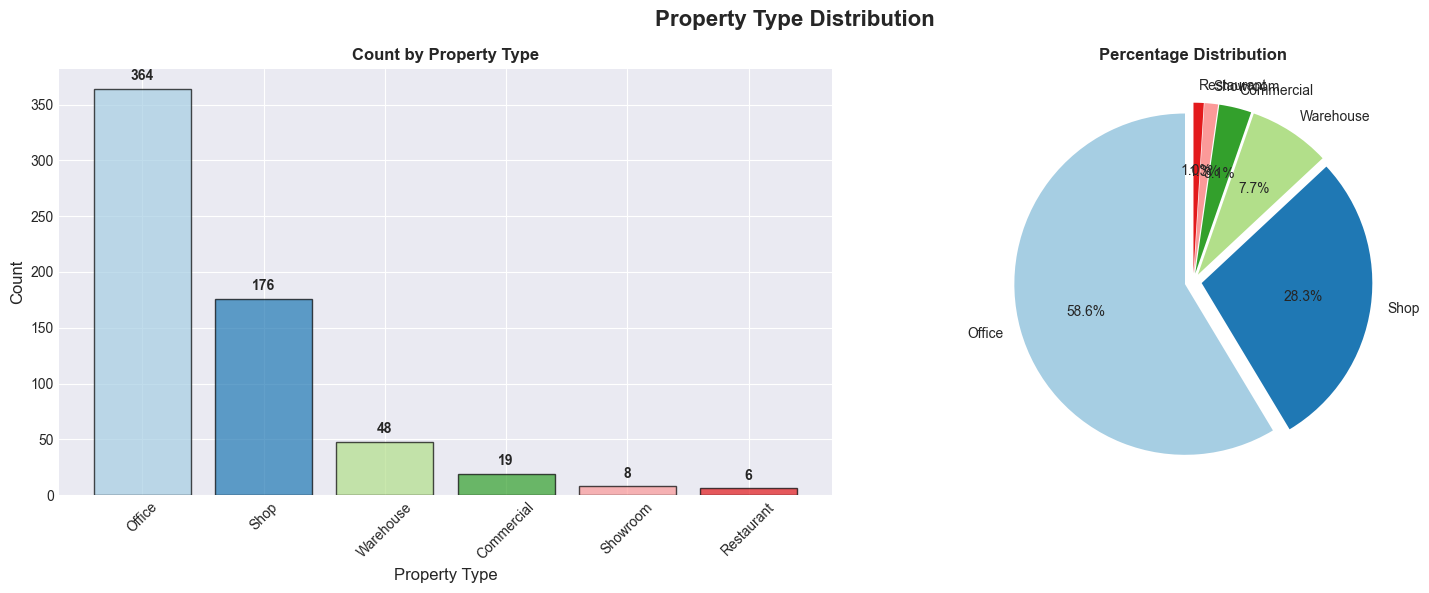


Property Type Distribution:
  Office          : 364 ( 58.6%)
  Shop            : 176 ( 28.3%)
  Warehouse       :  48 (  7.7%)
  Commercial      :  19 (  3.1%)
  Showroom        :   8 (  1.3%)
  Restaurant      :   6 (  1.0%)

Total: 621 properties


In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Property Type Distribution', fontsize=16, fontweight='bold')

# Bar Plot
prop_counts = df['property_type'].value_counts()
colors = plt.cm.Paired(range(len(prop_counts)))
axes[0].bar(prop_counts.index, prop_counts.values, color=colors, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Property Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Count by Property Type', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, v in enumerate(prop_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# Pie Chart
axes[1].pie(prop_counts.values, labels=prop_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors, explode=[0.05]*len(prop_counts))
axes[1].set_title('Percentage Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

# Statistics
print(f"\nProperty Type Distribution:")
for ptype, count in prop_counts.items():
    pct = (count / len(df)) * 100
    print(f"  {ptype:15} : {count:3} ({pct:5.1f}%)")
print(f"\nTotal: {len(df)} properties")

### 1.4 Rent per sqft Distribution (with Outliers)

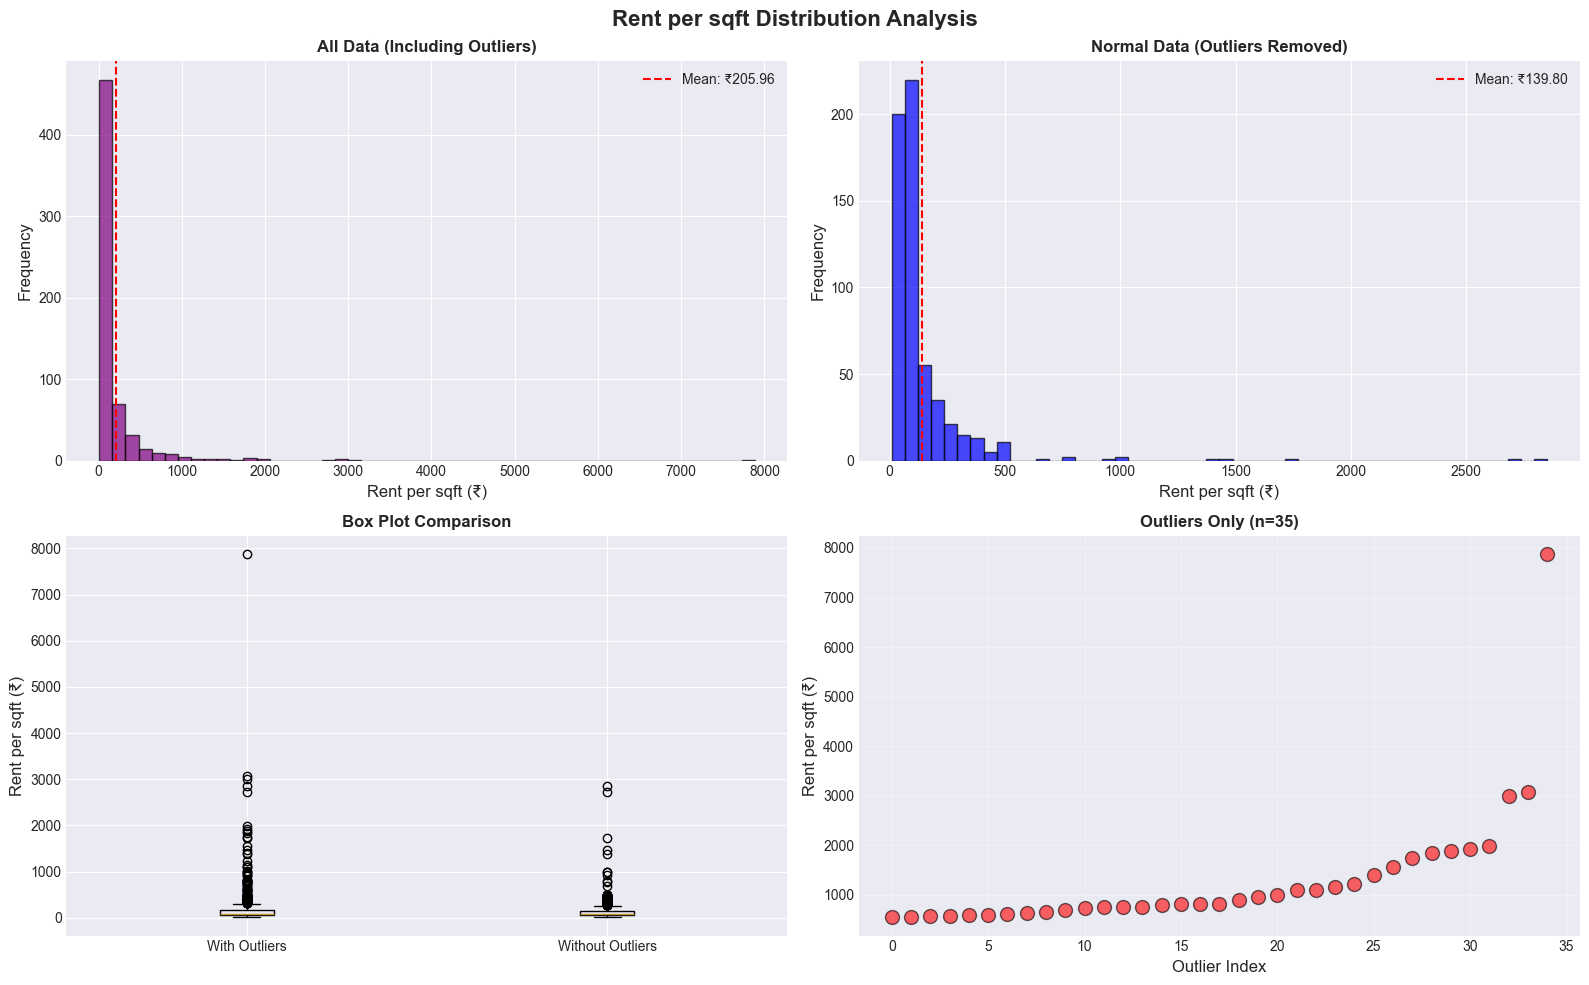


Rent per sqft Statistics:

All Data:
  Mean: ₹205.96
  Median: ₹84.62
  Max: ₹7883.12

Normal Data (without outliers):
  Mean: ₹139.80
  Median: ₹80.00
  Max: ₹2850.00

Outliers: 35 properties (5.6%)


In [18]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Rent per sqft Distribution Analysis', fontsize=16, fontweight='bold')

# All data histogram
axes[0, 0].hist(df['rent_per_sqft'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[0, 0].set_xlabel('Rent per sqft (₹)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('All Data (Including Outliers)', fontweight='bold')
axes[0, 0].axvline(df['rent_per_sqft'].mean(), color='red', linestyle='--', label=f'Mean: ₹{df["rent_per_sqft"].mean():.2f}')
axes[0, 0].legend()

# Normal data only (excluding outliers)
normal_data = df[df['rent_psf_outlier'] == 0]['rent_per_sqft']
axes[0, 1].hist(normal_data, bins=50, edgecolor='black', alpha=0.7, color='blue')
axes[0, 1].set_xlabel('Rent per sqft (₹)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Normal Data (Outliers Removed)', fontweight='bold')
axes[0, 1].axvline(normal_data.mean(), color='red', linestyle='--', label=f'Mean: ₹{normal_data.mean():.2f}')
axes[0, 1].legend()

# Box plot comparison
bp_data = [df['rent_per_sqft'], normal_data]
axes[1, 0].boxplot(bp_data, labels=['With Outliers', 'Without Outliers'], vert=True)
axes[1, 0].set_ylabel('Rent per sqft (₹)', fontsize=12)
axes[1, 0].set_title('Box Plot Comparison', fontweight='bold')

# Outlier distribution
outliers = df[df['rent_psf_outlier'] == 1]
if len(outliers) > 0:
    axes[1, 1].scatter(range(len(outliers)), outliers['rent_per_sqft'].sort_values(), 
                      c='red', s=100, alpha=0.6, edgecolors='black')
    axes[1, 1].set_xlabel('Outlier Index', fontsize=12)
    axes[1, 1].set_ylabel('Rent per sqft (₹)', fontsize=12)
    axes[1, 1].set_title(f'Outliers Only (n={len(outliers)})', fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
print(f"\nRent per sqft Statistics:")
print(f"\nAll Data:")
print(f"  Mean: ₹{df['rent_per_sqft'].mean():.2f}")
print(f"  Median: ₹{df['rent_per_sqft'].median():.2f}")
print(f"  Max: ₹{df['rent_per_sqft'].max():.2f}")
print(f"\nNormal Data (without outliers):")
print(f"  Mean: ₹{normal_data.mean():.2f}")
print(f"  Median: ₹{normal_data.median():.2f}")
print(f"  Max: ₹{normal_data.max():.2f}")
print(f"\nOutliers: {len(outliers)} properties ({len(outliers)/len(df)*100:.1f}%)")

---

# 2️⃣ BIVARIATE ANALYSIS

**Purpose:** Understand relationships between two variables

**Relationships Analyzed:**
- Rent vs Area
- Rent vs Property Type
- Area vs Property Type
- Rent per sqft by Property Type

---

### 2.1 Rent vs Area Relationship

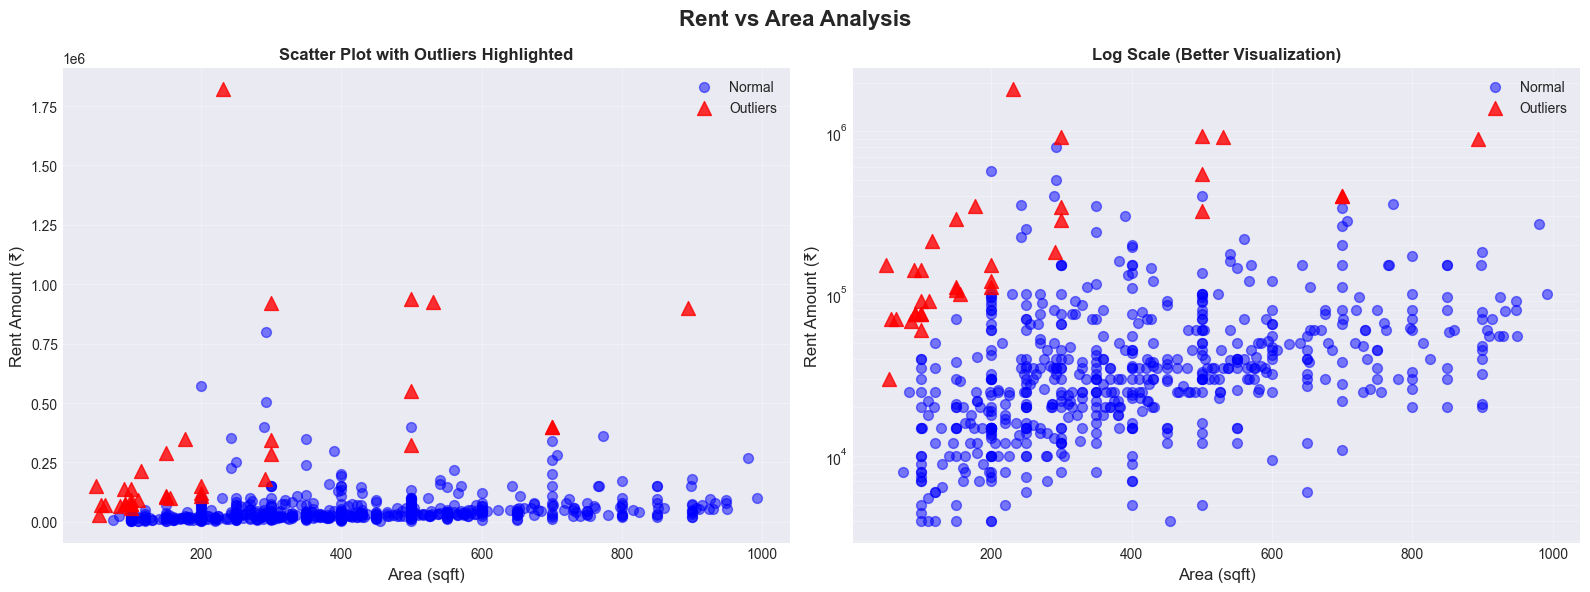


Correlation between Rent and Area: 0.1073

📊 Interpretation:
  Weak correlation - Area doesn't strongly predict rent


In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Rent vs Area Analysis', fontsize=16, fontweight='bold')

# Scatter plot - All data
normal = df[df['rent_psf_outlier'] == 0]
outliers = df[df['rent_psf_outlier'] == 1]

axes[0].scatter(normal['area_sqft'], normal['rent_amount'], alpha=0.5, s=50, c='blue', label='Normal')
axes[0].scatter(outliers['area_sqft'], outliers['rent_amount'], alpha=0.8, s=100, c='red', marker='^', label='Outliers')
axes[0].set_xlabel('Area (sqft)', fontsize=12)
axes[0].set_ylabel('Rent Amount (₹)', fontsize=12)
axes[0].set_title('Scatter Plot with Outliers Highlighted', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Log scale scatter plot
axes[1].scatter(normal['area_sqft'], normal['rent_amount'], alpha=0.5, s=50, c='blue', label='Normal')
axes[1].scatter(outliers['area_sqft'], outliers['rent_amount'], alpha=0.8, s=100, c='red', marker='^', label='Outliers')
axes[1].set_xlabel('Area (sqft)', fontsize=12)
axes[1].set_ylabel('Rent Amount (₹)', fontsize=12)
axes[1].set_yscale('log')
axes[1].set_title('Log Scale (Better Visualization)', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

# Correlation
corr = df['rent_amount'].corr(df['area_sqft'])
print(f"\nCorrelation between Rent and Area: {corr:.4f}")
print(f"\n📊 Interpretation:")
if corr > 0.7:
    print("  Strong positive correlation - Larger areas tend to have higher rents")
elif corr > 0.4:
    print("  Moderate positive correlation - Some relationship between area and rent")
else:
    print("  Weak correlation - Area doesn't strongly predict rent")

### 2.2 Rent Distribution by Property Type

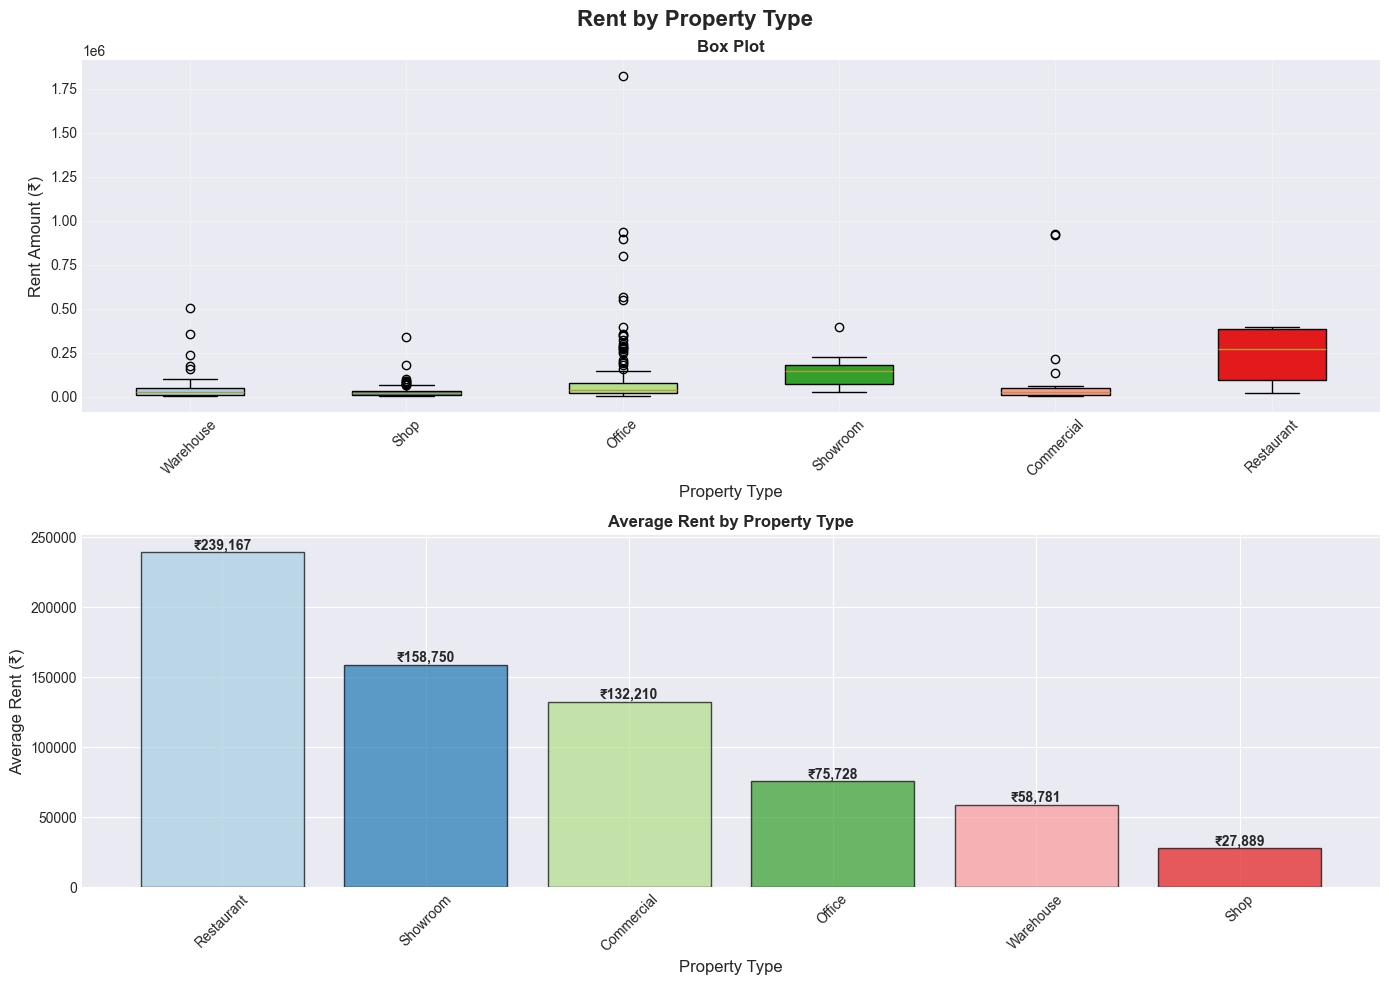


Average Rent by Property Type:
  Restaurant      : ₹239,166.67
  Showroom        : ₹158,750.00
  Commercial      : ₹132,210.47
  Office          : ₹75,727.74
  Warehouse       : ₹58,781.23
  Shop            : ₹27,889.19


In [20]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('Rent by Property Type', fontsize=16, fontweight='bold')

# Box plot
property_types = df['property_type'].unique()
rent_by_type = [df[df['property_type'] == pt]['rent_amount'].values for pt in property_types]

bp = axes[0].boxplot(rent_by_type, labels=property_types, vert=True, patch_artist=True)
for patch, color in zip(bp['boxes'], plt.cm.Paired(range(len(property_types)))):
    patch.set_facecolor(color)
axes[0].set_xlabel('Property Type', fontsize=12)
axes[0].set_ylabel('Rent Amount (₹)', fontsize=12)
axes[0].set_title('Box Plot', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Bar plot with average rent
avg_rent = df.groupby('property_type')['rent_amount'].mean().sort_values(ascending=False)
colors = plt.cm.Paired(range(len(avg_rent)))
bars = axes[1].bar(avg_rent.index, avg_rent.values, color=colors, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Property Type', fontsize=12)
axes[1].set_ylabel('Average Rent (₹)', fontsize=12)
axes[1].set_title('Average Rent by Property Type', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'₹{height:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Statistics
print(f"\nAverage Rent by Property Type:")
for ptype, rent in avg_rent.items():
    print(f"  {ptype:15} : ₹{rent:,.2f}")

### 2.3 Area Distribution by Property Type

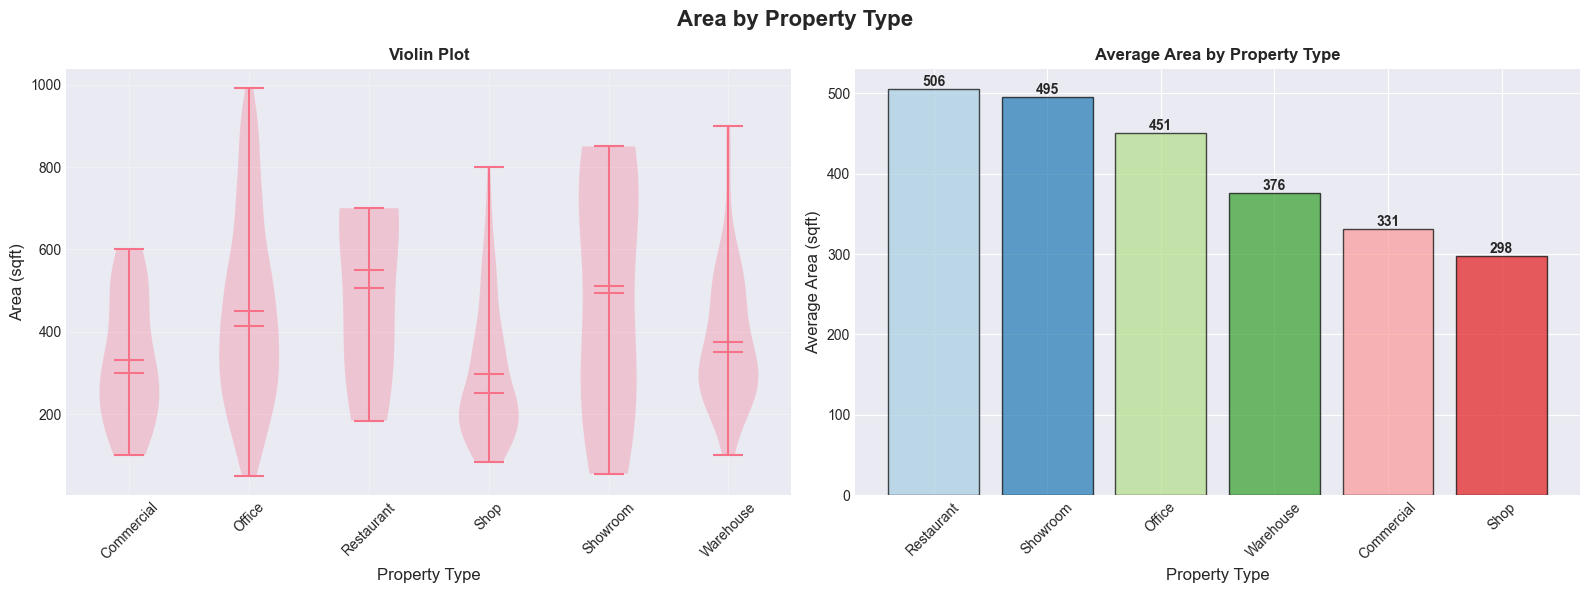


Average Area by Property Type:
  Restaurant      : 505.67 sqft
  Showroom        : 495.00 sqft
  Office          : 450.51 sqft
  Warehouse       : 376.03 sqft
  Commercial      : 331.32 sqft
  Shop            : 297.61 sqft


In [21]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Area by Property Type', fontsize=16, fontweight='bold')

# Violin plot
property_types = sorted(df['property_type'].unique())
area_by_type = [df[df['property_type'] == pt]['area_sqft'].values for pt in property_types]

parts = axes[0].violinplot(area_by_type, positions=range(len(property_types)), showmeans=True, showmedians=True)
axes[0].set_xticks(range(len(property_types)))
axes[0].set_xticklabels(property_types, rotation=45)
axes[0].set_xlabel('Property Type', fontsize=12)
axes[0].set_ylabel('Area (sqft)', fontsize=12)
axes[0].set_title('Violin Plot', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Average area bar plot
avg_area = df.groupby('property_type')['area_sqft'].mean().sort_values(ascending=False)
colors = plt.cm.Paired(range(len(avg_area)))
bars = axes[1].bar(avg_area.index, avg_area.values, color=colors, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Property Type', fontsize=12)
axes[1].set_ylabel('Average Area (sqft)', fontsize=12)
axes[1].set_title('Average Area by Property Type', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Statistics
print(f"\nAverage Area by Property Type:")
for ptype, area in avg_area.items():
    print(f"  {ptype:15} : {area:,.2f} sqft")

### 2.4 Correlation Matrix (Numerical Variables)

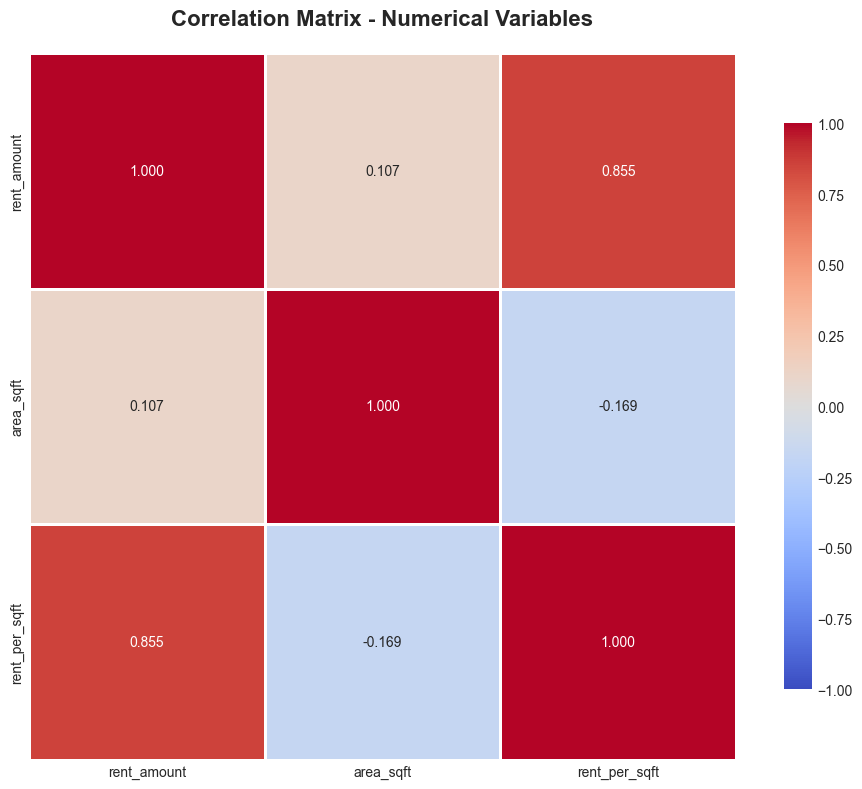


Correlation Insights:
  Rent ↔ Area: 0.107
  Rent ↔ Rent/sqft: 0.855
  Area ↔ Rent/sqft: -0.169


In [22]:
# Select numerical columns for correlation
numerical_cols = ['rent_amount', 'area_sqft', 'rent_per_sqft']
corr_matrix = df[numerical_cols].corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Correlation Matrix - Numerical Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print(f"\nCorrelation Insights:")
print(f"  Rent ↔ Area: {corr_matrix.loc['rent_amount', 'area_sqft']:.3f}")
print(f"  Rent ↔ Rent/sqft: {corr_matrix.loc['rent_amount', 'rent_per_sqft']:.3f}")
print(f"  Area ↔ Rent/sqft: {corr_matrix.loc['area_sqft', 'rent_per_sqft']:.3f}")

---

# 3️⃣ MULTIVARIATE ANALYSIS

**Purpose:** Understand complex relationships involving 3+ variables

**Relationships Analyzed:**
- Rent vs Area colored by Property Type
- Property Type vs Rent vs Area (Bubble Chart)
- Rent per sqft by Property Type and Outlier Status
- Top Localities Analysis

---

### 3.1 Rent vs Area by Property Type

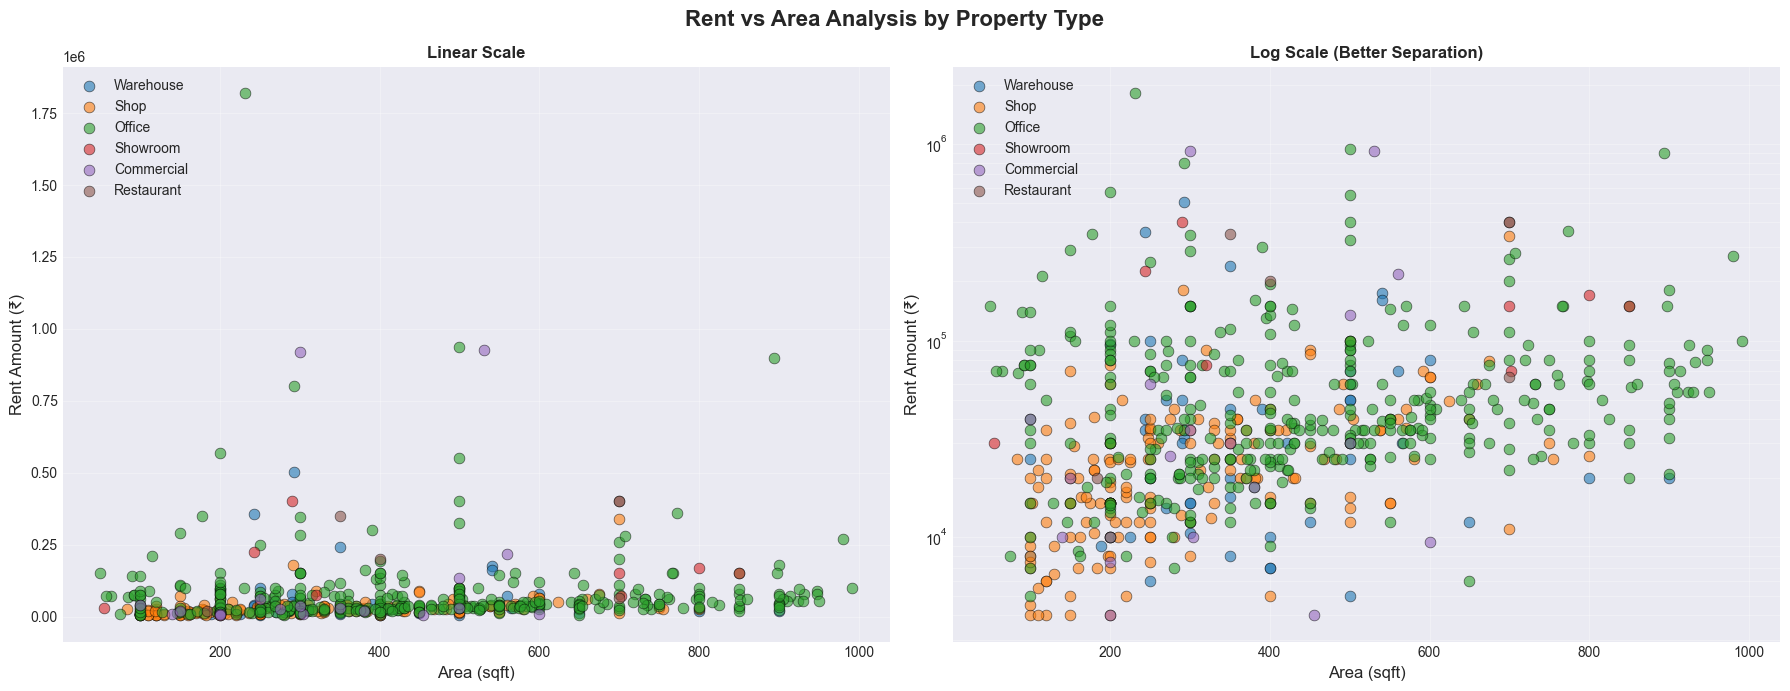


📊 Insights:
  - Each color represents a different property type
  - Log scale helps visualize the full range of rents
  - Clustering patterns show property type characteristics


In [23]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Rent vs Area Analysis by Property Type', fontsize=16, fontweight='bold')

# Scatter plot colored by property type
property_types = df['property_type'].unique()
colors = plt.cm.tab10(range(len(property_types)))

for ptype, color in zip(property_types, colors):
    subset = df[df['property_type'] == ptype]
    axes[0].scatter(subset['area_sqft'], subset['rent_amount'], 
                   alpha=0.6, s=60, c=[color], label=ptype, edgecolors='black', linewidth=0.5)

axes[0].set_xlabel('Area (sqft)', fontsize=12)
axes[0].set_ylabel('Rent Amount (₹)', fontsize=12)
axes[0].set_title('Linear Scale', fontweight='bold')
axes[0].legend(loc='upper left', framealpha=0.9)
axes[0].grid(True, alpha=0.3)

# Log scale version
for ptype, color in zip(property_types, colors):
    subset = df[df['property_type'] == ptype]
    axes[1].scatter(subset['area_sqft'], subset['rent_amount'], 
                   alpha=0.6, s=60, c=[color], label=ptype, edgecolors='black', linewidth=0.5)

axes[1].set_xlabel('Area (sqft)', fontsize=12)
axes[1].set_ylabel('Rent Amount (₹)', fontsize=12)
axes[1].set_yscale('log')
axes[1].set_title('Log Scale (Better Separation)', fontweight='bold')
axes[1].legend(loc='upper left', framealpha=0.9)
axes[1].grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

print("\n📊 Insights:")
print("  - Each color represents a different property type")
print("  - Log scale helps visualize the full range of rents")
print("  - Clustering patterns show property type characteristics")

### 3.2 Bubble Chart (Rent vs Area, sized by Rent/sqft)

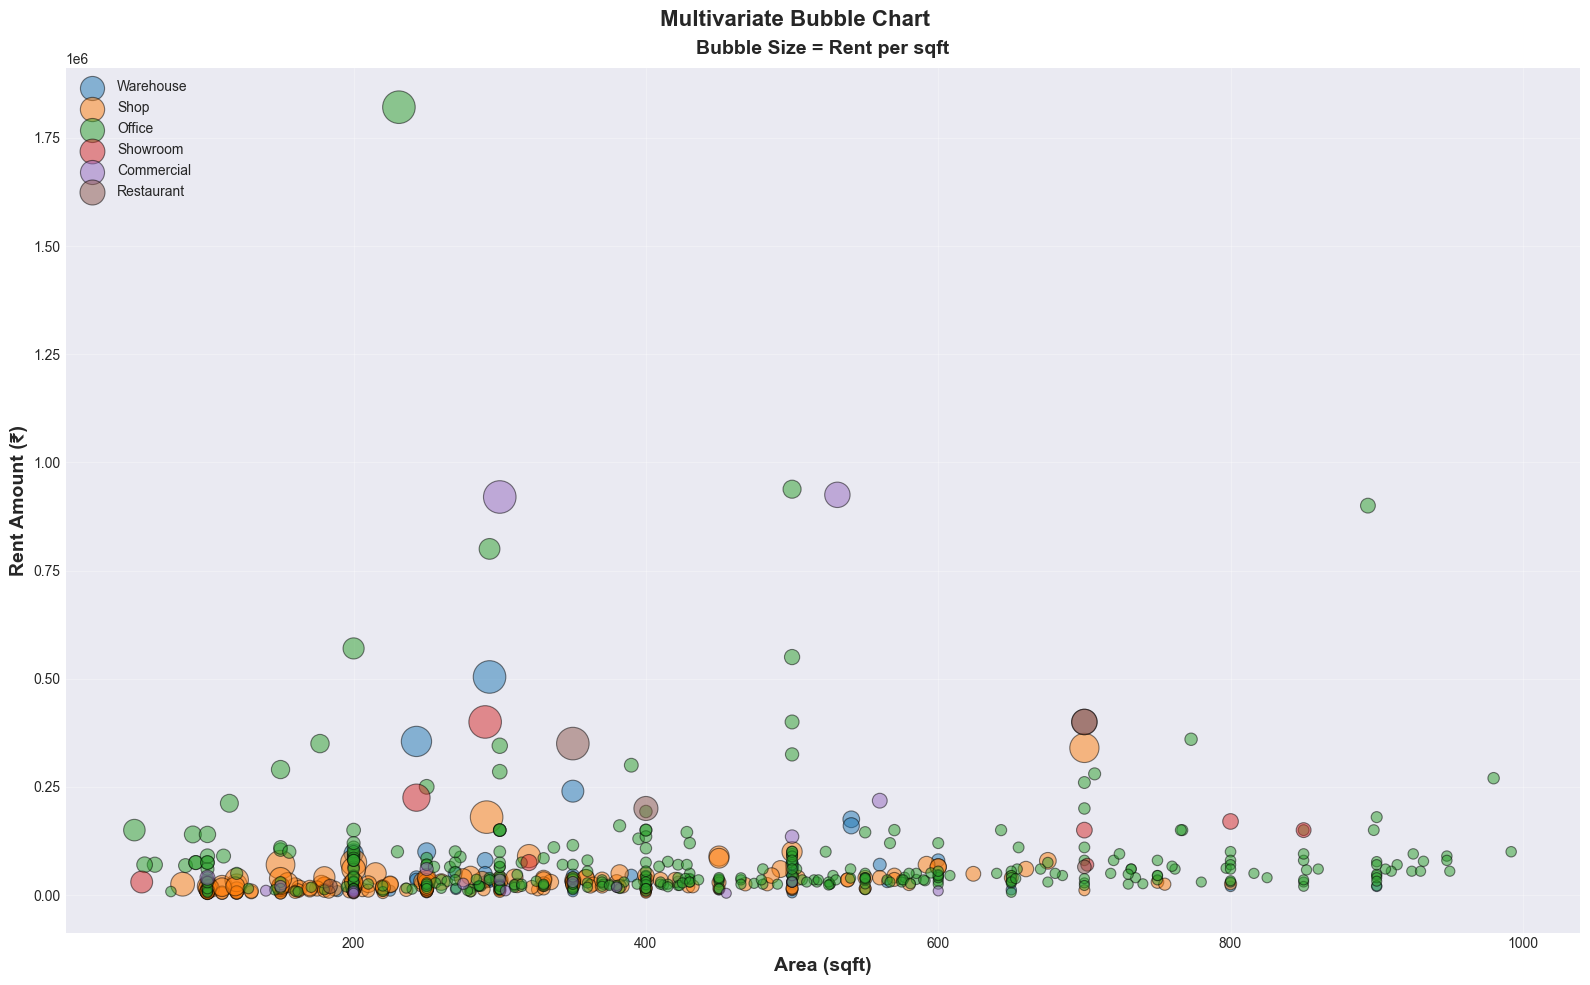


📊 How to Read:
  - X-axis: Property Area (sqft)
  - Y-axis: Monthly Rent (₹)
  - Bubble Size: Rent per sqft (larger = more expensive per sqft)
  - Color: Property Type


In [24]:
fig, ax = plt.subplots(figsize=(16, 10))
fig.suptitle('Multivariate Bubble Chart', fontsize=16, fontweight='bold')

# Create bubble chart
property_types = df['property_type'].unique()
colors = plt.cm.tab10(range(len(property_types)))

for ptype, color in zip(property_types, colors):
    subset = df[df['property_type'] == ptype]
    # Bubble size based on rent_per_sqft (scaled for visibility)
    sizes = (subset['rent_per_sqft'] / subset['rent_per_sqft'].max()) * 500 + 50
    
    ax.scatter(subset['area_sqft'], subset['rent_amount'], 
              s=sizes, alpha=0.5, c=[color], label=ptype, edgecolors='black', linewidth=0.8)

ax.set_xlabel('Area (sqft)', fontsize=14, fontweight='bold')
ax.set_ylabel('Rent Amount (₹)', fontsize=14, fontweight='bold')
ax.set_title('Bubble Size = Rent per sqft', fontsize=14, fontweight='bold', pad=10)
ax.legend(loc='upper left', framealpha=0.9, fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 How to Read:")
print("  - X-axis: Property Area (sqft)")
print("  - Y-axis: Monthly Rent (₹)")
print("  - Bubble Size: Rent per sqft (larger = more expensive per sqft)")
print("  - Color: Property Type")

### 3.3 Outlier Analysis by Property Type

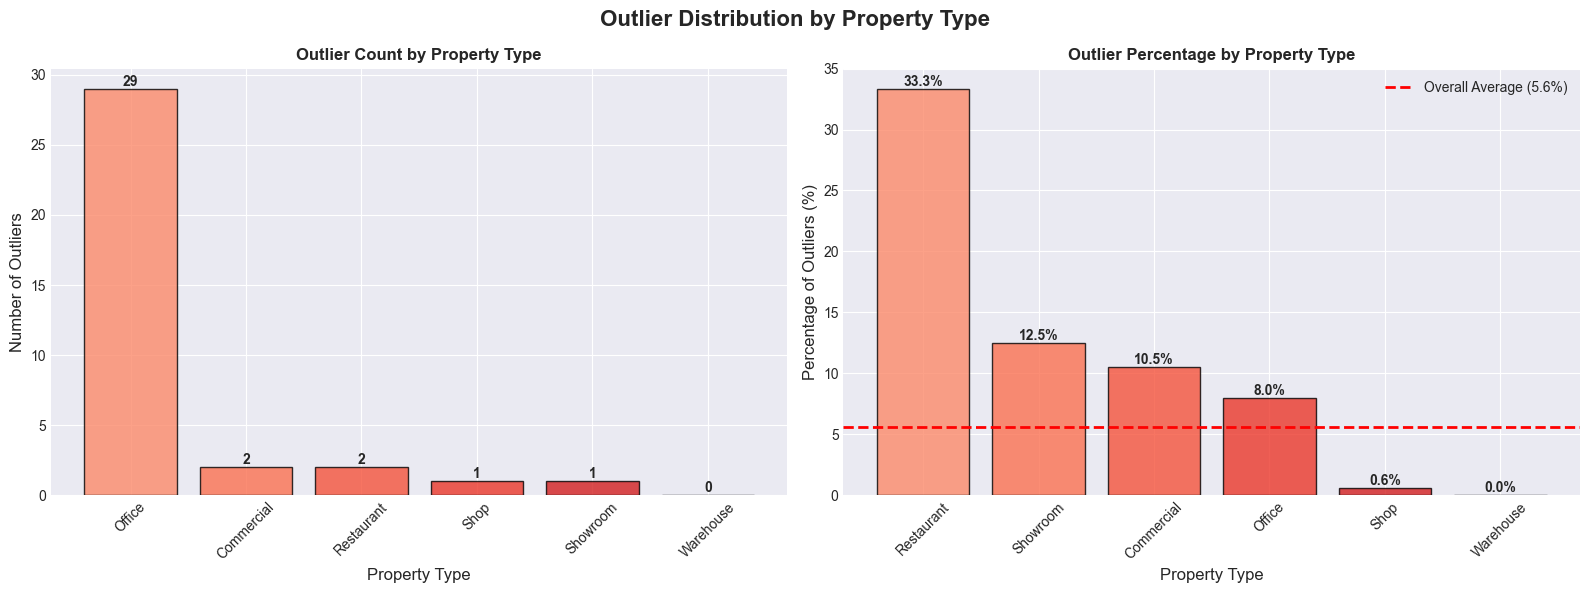


Outlier Distribution:
  Office          : 29 outliers (8.0%)
  Commercial      : 2 outliers (10.5%)
  Restaurant      : 2 outliers (33.3%)
  Shop            : 1 outliers (0.6%)
  Showroom        : 1 outliers (12.5%)
  Warehouse       : 0 outliers (0.0%)


In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Outlier Distribution by Property Type', fontsize=16, fontweight='bold')

# Count of outliers by property type
outlier_counts = df.groupby('property_type')['rent_psf_outlier'].sum().sort_values(ascending=False)
colors = plt.cm.Reds(np.linspace(0.4, 0.8, len(outlier_counts)))

bars = axes[0].bar(outlier_counts.index, outlier_counts.values, color=colors, edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Property Type', fontsize=12)
axes[0].set_ylabel('Number of Outliers', fontsize=12)
axes[0].set_title('Outlier Count by Property Type', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Percentage of outliers by property type
outlier_pct = (df.groupby('property_type')['rent_psf_outlier'].sum() / 
               df.groupby('property_type').size() * 100).sort_values(ascending=False)

bars2 = axes[1].bar(outlier_pct.index, outlier_pct.values, color=colors, edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Property Type', fontsize=12)
axes[1].set_ylabel('Percentage of Outliers (%)', fontsize=12)
axes[1].set_title('Outlier Percentage by Property Type', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(5.6, color='red', linestyle='--', label='Overall Average (5.6%)', linewidth=2)
axes[1].legend()

# Add value labels
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nOutlier Distribution:")
for ptype in outlier_counts.index:
    count = outlier_counts[ptype]
    pct = outlier_pct[ptype]
    print(f"  {ptype:15} : {int(count)} outliers ({pct:.1f}%)")

### 3.4 Top Localities Analysis

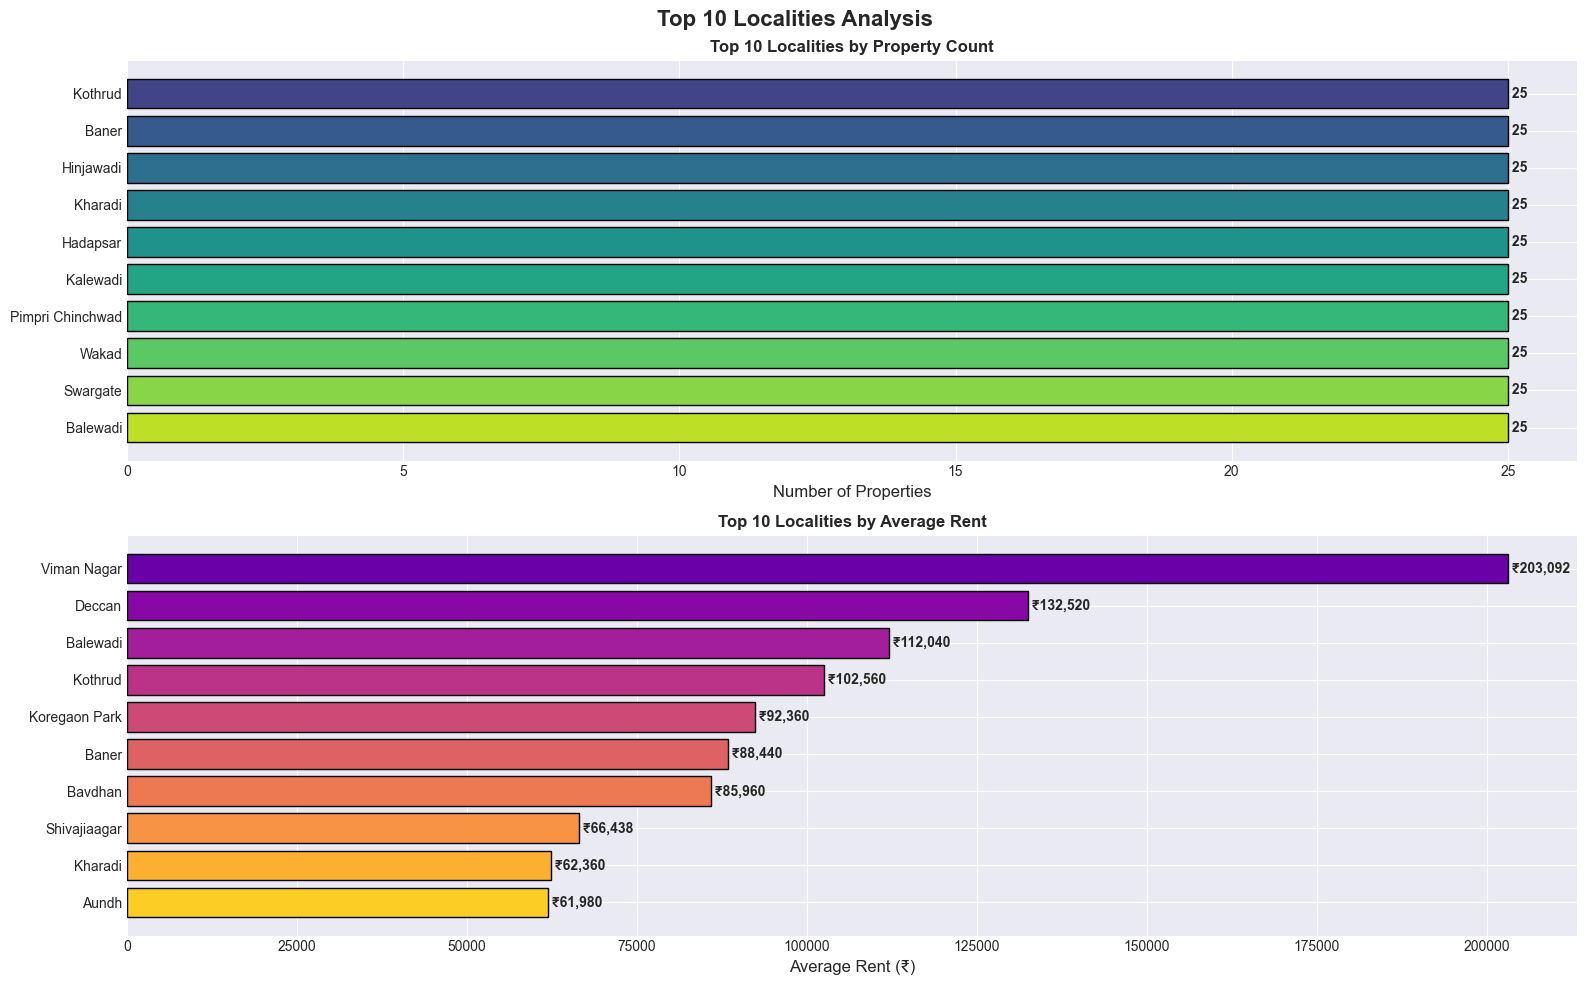


Top 10 Localities by Count:
  Kothrud              : 25 properties
  Baner                : 25 properties
  Hinjawadi            : 25 properties
  Kharadi              : 25 properties
  Hadapsar             : 25 properties
  Kalewadi             : 25 properties
  Pimpri Chinchwad     : 25 properties
  Wakad                : 25 properties
  Swargate             : 25 properties
  Balewadi             : 25 properties

Top 10 Localities by Average Rent:
  Viman Nagar          : ₹203,091.62
  Deccan               : ₹132,519.96
  Balewadi             : ₹112,040.00
  Kothrud              : ₹102,559.96
  Koregaon Park        : ₹92,360.00
  Baner                : ₹88,440.00
  Bavdhan              : ₹85,960.00
  Shivajiaagar         : ₹66,437.50
  Kharadi              : ₹62,360.00
  Aundh                : ₹61,980.00


In [26]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10))
fig.suptitle('Top 10 Localities Analysis', fontsize=16, fontweight='bold')

# Top 10 localities by count
top_10_localities = df['locality'].value_counts().head(10)
colors_count = plt.cm.viridis(np.linspace(0.2, 0.9, 10))

bars1 = axes[0].barh(range(10), top_10_localities.values, color=colors_count, edgecolor='black')
axes[0].set_yticks(range(10))
axes[0].set_yticklabels(top_10_localities.index)
axes[0].set_xlabel('Number of Properties', fontsize=12)
axes[0].set_title('Top 10 Localities by Property Count', fontweight='bold')
axes[0].invert_yaxis()

# Add value labels
for i, bar in enumerate(bars1):
    width = bar.get_width()
    axes[0].text(width, bar.get_y() + bar.get_height()/2.,
                f' {int(width)}', ha='left', va='center', fontweight='bold')

# Top 10 localities by average rent
top_rent_localities = df.groupby('locality')['rent_amount'].mean().sort_values(ascending=False).head(10)
colors_rent = plt.cm.plasma(np.linspace(0.2, 0.9, 10))

bars2 = axes[1].barh(range(10), top_rent_localities.values, color=colors_rent, edgecolor='black')
axes[1].set_yticks(range(10))
axes[1].set_yticklabels(top_rent_localities.index)
axes[1].set_xlabel('Average Rent (₹)', fontsize=12)
axes[1].set_title('Top 10 Localities by Average Rent', fontweight='bold')
axes[1].invert_yaxis()

# Add value labels
for i, bar in enumerate(bars2):
    width = bar.get_width()
    axes[1].text(width, bar.get_y() + bar.get_height()/2.,
                f' ₹{width:,.0f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTop 10 Localities by Count:")
for loc, count in top_10_localities.items():
    print(f"  {loc:20} : {count} properties")

print(f"\nTop 10 Localities by Average Rent:")
for loc, rent in top_rent_localities.items():
    print(f"  {loc:20} : ₹{rent:,.2f}")

---

# 📈 SUMMARY & KEY INSIGHTS

---

## Key Findings from Analysis

### 📊 Dataset Overview
- **Total Properties:** 621 (after cleaning)
- **Data Quality:** 99.36%
- **Data Removed:** 4 records (0.64%)
- **Missing Types Fixed:** 17 properties classified
- **Outliers Flagged:** 35 properties (5.6%)

### 🏢 Property Type Distribution
- **Office:** Dominant property type (~59%)
- **Shop:** Second most common (~28%)
- **Warehouse:** Third place (~8%)
- Other types: Showroom, Commercial, Restaurant, Kiosk

### 💰 Rent Analysis
- **Average Rent:** ₹65,237/month
- **Median Rent:** ₹35,000/month
- **Range:** ₹4,000 - ₹1,821,000
- **Distribution:** Right-skewed (mean > median)

### 📐 Area Analysis
- **Average Area:** ~399 sqft
- **Median Area:** Lower than mean (right-skewed)
- **Range:** 50 - 5,000+ sqft (after cleaning)

### 📍 Rent per sqft
- **Normal Range:** Most properties under ₹200/sqft
- **Outliers:** 35 properties with extreme rent/sqft values
- **Maximum:** ₹7,883/sqft (Viman Nagar Office)

### 🔗 Relationships
- **Rent ↔ Area:** Positive correlation (larger = higher rent)
- **Property Type Impact:** Significant variation in rent and area by type
- **Locality Effect:** Premium locations command higher rents

### 🎯 Outliers
- **Count:** 35 properties (5.6%)
- **Characteristics:** Extremely high rent per sqft
- **Possible Causes:** Premium locations, data errors, special amenities
- **Action:** Flagged for PPT presentation, not removed

---

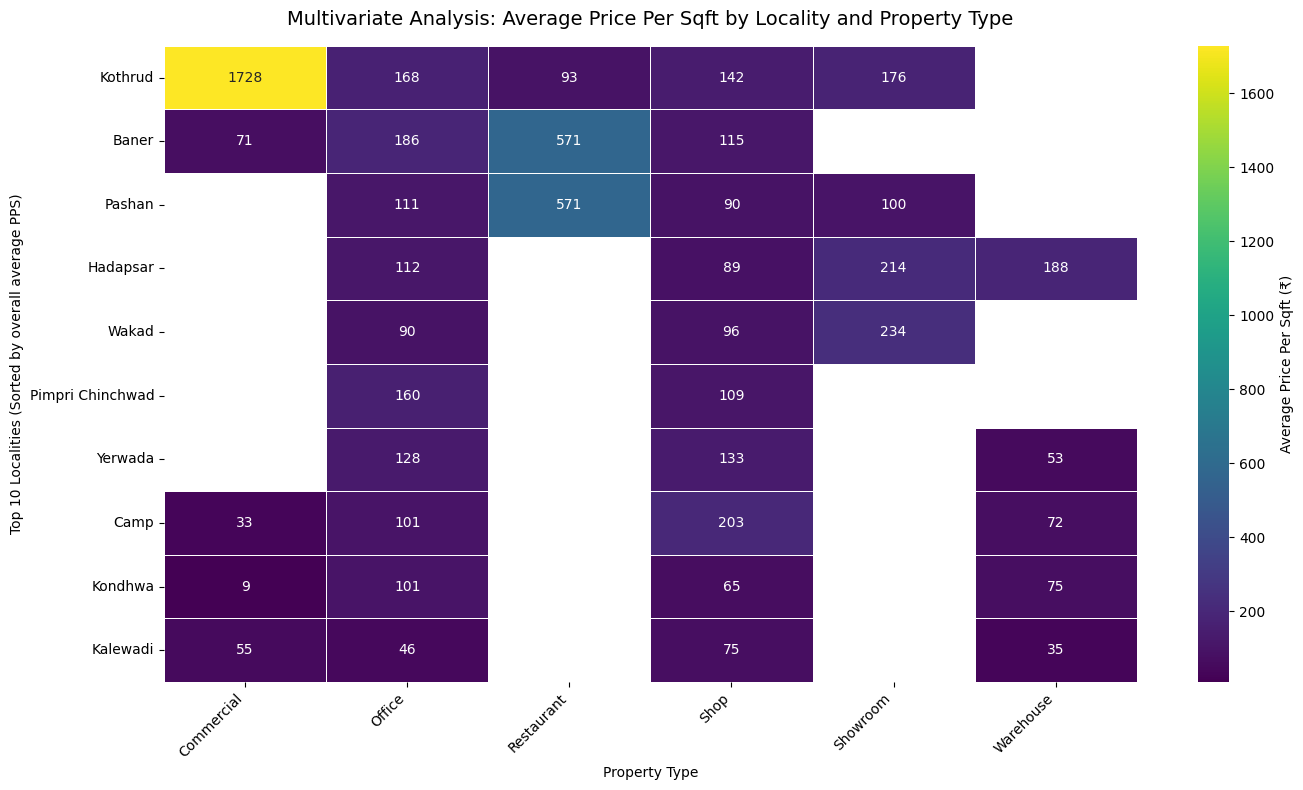

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data (assuming the file is in the current working directory)
df = pd.read_csv("pune_commercial_listings_cleaned.csv")

# 2. Filter data: Select the top 10 localities by listing count
top10_localities = df['locality'].value_counts().head(10).index
df_filtered = df[df['locality'].isin(top10_localities)]

# 3. Create the Pivot Table: Mean Price Per Square Foot (PPS)
# This calculation gives the average value (PPS) for every unique combination of Locality and Property Type.
pivot_table = pd.pivot_table(
    df_filtered,
    values='price_per_sqft',
    index='locality',
    columns='property_type',
    aggfunc='mean'
).round(0)

# 4. Sort the Pivot Table (Rows) for better visual hierarchy
# Sort rows by the overall average PPS for that locality, placing the most expensive at the top.
pivot_table['mean_pps'] = pivot_table.mean(axis=1)
pivot_table = pivot_table.sort_values(by='mean_pps', ascending=False).drop(columns='mean_pps')

# 5. Generate the Heatmap Visualization
plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot_table,
    annot=True,              # Display the numerical value in each cell
    fmt=".0f",               # Format the annotation as a whole number (no decimals)
    cmap='viridis',          # Use a color map that transitions well (yellow-green-blue)
    linewidths=.5,           # Add borders between cells
    cbar_kws={'label': 'Average Price Per Sqft (₹)'} # Label the color bar
)

plt.title('Multivariate Analysis: Average Price Per Sqft by Locality and Property Type', fontsize=14, pad=15)
plt.ylabel('Top 10 Localities (Sorted by overall average PPS)')
plt.xlabel('Property Type')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save the plot
plt.show() # Use plt.show() in a notebook to display the plot
# plt.savefig('heatmap_pps_by_locality_type.png') # Use this line if you want to save the image to a file